# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#import import_ipynb
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

citi_id = []
citi = []
cloudi = []
country_name = []
humid_temp = []
lat_coord = []
lng_coord = []
top_temp = []
wind_speed_measure = []

for city in cities:
    
    response = requests.get(query_url + city).json()
    
    try:
        
        #citi_id.append(response['id'])
        
        #citi.append(response['name'])
        
        city_id = response['id']
        citi_id.append(city_id)
        
        city_detail = response['name']
        citi.append(city_detail)
        
        cloud = response['clouds']['all']
        cloudi.append(cloud)
        
        country = response['sys']['country']
        country_name.append(country)
        
        temperature_look = response['main']['temp']
        top_temp.append(temperature_look)
        
        humid = response['main']['humidity']
        humid_temp.append(humid)
        
        lat = response['coord']['lat']
        lat_coord.append(lat)
        
        lng = response['coord']['lon']
        lng_coord.append(lng)
        
        wind_speed = response['wind']['speed']
        wind_speed_measure.append(wind_speed)
        
        print(f"City Name: {city}, City ID: {city_id}")
     
    except:
        
        print("This information is not found, Skipping to found information")
        

City Name: cedar city, City ID: 5536630
This information is not found, Skipping to found information
This information is not found, Skipping to found information
City Name: listvyanka, City ID: 2020744
City Name: edd, City ID: 338345
City Name: thompson, City ID: 6165406
City Name: provideniya, City ID: 4031574
City Name: samana, City ID: 3492997
City Name: mayumba, City ID: 2399001
City Name: vila velha, City ID: 3445026
City Name: hofn, City ID: 2630299
City Name: butaritari, City ID: 2110227
City Name: marsh harbour, City ID: 3571913
City Name: laguna, City ID: 5364271
City Name: hermanus, City ID: 3366880
City Name: tiksi, City ID: 2015306
This information is not found, Skipping to found information
This information is not found, Skipping to found information
City Name: port elizabeth, City ID: 964420
City Name: puerto ayora, City ID: 3652764
City Name: vao, City ID: 2137773
City Name: hobart, City ID: 2163355
City Name: kharar, City ID: 1266960
City Name: albany, City ID: 5106841


City Name: thouars, City ID: 2972695
City Name: terme, City ID: 738803
City Name: hobyo, City ID: 57000
City Name: mabiton, City ID: 1704533
City Name: lianzhou, City ID: 1803841
City Name: hualmay, City ID: 3939761
City Name: meulaboh, City ID: 1214488
City Name: pimentel, City ID: 3693584
City Name: mutoko, City ID: 884927
City Name: alyangula, City ID: 2079582
City Name: thai binh, City ID: 1566346
City Name: la rioja, City ID: 3336897
City Name: scicli, City ID: 2523192
City Name: monrovia, City ID: 2274895
City Name: dikson, City ID: 1507390
City Name: tecuci, City ID: 665355
City Name: sabha, City ID: 2212775
City Name: sisimiut, City ID: 3419842
This information is not found, Skipping to found information
City Name: caceres, City ID: 2520610
City Name: baracoa, City ID: 3567834
City Name: oranjemund, City ID: 3354071
City Name: ahipara, City ID: 2194098
City Name: little elm, City ID: 4706736
City Name: cap-haitien, City ID: 3728474
City Name: avera, City ID: 4231997
This inform

City Name: severo-kurilsk, City ID: 2121385
City Name: necochea, City ID: 3430443
City Name: sulina, City ID: 665790
City Name: leshukonskoye, City ID: 535839
City Name: orsha, City ID: 624079
City Name: turinskaya sloboda, City ID: 1488931
City Name: ha tinh, City ID: 1581047
City Name: cooma, City ID: 2170577
City Name: lagoa, City ID: 3372964
City Name: aksu, City ID: 1529660
City Name: svetlaya, City ID: 2015852
City Name: athabasca, City ID: 5887916
City Name: kalmunai, City ID: 1242110
This information is not found, Skipping to found information
City Name: cascais, City ID: 2269594
City Name: corn island, City ID: 3620266
City Name: divo, City ID: 2289887
City Name: hoi an, City ID: 1580541
City Name: virginia beach, City ID: 4791259
City Name: kapiri mposhi, City ID: 913029
City Name: dwarka, City ID: 1272140
City Name: visby, City ID: 2662689
City Name: katav-ivanovsk, City ID: 551794
City Name: codrington, City ID: 2171099
City Name: bardiyah, City ID: 80509
City Name: cabo sa

City Name: zabaykalsk, City ID: 2012780
City Name: puerto padre, City ID: 3543299
City Name: rafai, City ID: 236524
City Name: kurmanayevka, City ID: 538685
City Name: beyneu, City ID: 610298
City Name: bilibino, City ID: 2126682
City Name: plettenberg bay, City ID: 964712
City Name: maltahohe, City ID: 3355624
This information is not found, Skipping to found information
City Name: vincennes, City ID: 6613142
City Name: karwar, City ID: 1267635
City Name: paamiut, City ID: 3421193
City Name: illela, City ID: 2337680
City Name: danilov, City ID: 567183
City Name: rawson, City ID: 3839307
City Name: huanren, City ID: 2036713
City Name: rorvik, City ID: 3141310
City Name: okhotsk, City ID: 2122605
City Name: palora, City ID: 3653523
This information is not found, Skipping to found information
City Name: nizhniy tsasuchey, City ID: 2019118


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

citi_weather_df = pd.DataFrame({"City ID": citi_id, "City": citi, "Cloudiness": cloudi, 
                                "Country": country_name, "Humidity": humid_temp, "Lat": lat_coord,
                               "Lng": lng_coord, "Temperature": top_temp, "Wind Speed": wind_speed_measure})

citi_weather_df

,City ID,City,Cloudiness,Country,Humidity,Lat,Lng,Temperature,Wind Speed
0,5536630,Cedar City,100,US,48,37.6775,-113.0619,26.89,2.22
1,2020744,Listvyanka,25,RU,91,51.8535,104.8693,12.54,1.93
2,338345,Edd,100,ER,69,13.9297,41.6925,32.57,0.90
3,6165406,Thompson,20,CA,46,55.7435,-97.8558,22.09,3.09
4,4031574,Provideniya,16,RU,60,64.3833,-173.3000,7.17,0.70
...,...,...,...,...,...,...,...,...,...
580,2036713,Huanren,100,CN,100,41.2647,125.3667,21.42,2.28
581,3141310,Rørvik,20,NO,77,64.8621,11.2373,17.06,3.09
582,2122605,Okhotsk,100,RU,95,59.3833,143.3000,13.34,3.68
583,3653523,Palora,78,EC,52,-1.7000,-77.9333,28.06,2.28


In [29]:
citi_weather_df.to_csv("output_data/cities.csv", index=False, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
citi_weather_df["Humidity"]>100

0      False
1      False
2      False
3      False
4      False
       ...  
580    False
581    False
582    False
583    False
584    False
Name: Humidity, Length: 585, dtype: bool

In [6]:
#  Get the indices of cities that have humidity over 100%.
citi_weather_df.loc[citi_weather_df["Humidity"]>100]


,City ID,City,Cloudiness,Country,Humidity,Lat,Lng,Temperature,Wind Speed


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

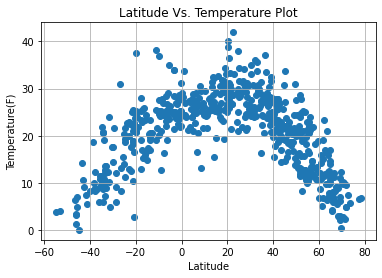

In [30]:
x_values = citi_weather_df["Lat"]
y_values = citi_weather_df["Temperature"]

plt.scatter(x_values,y_values)
plt.grid(visible=True)
plt.title("Latitude Vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig("Images/Lat_V_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

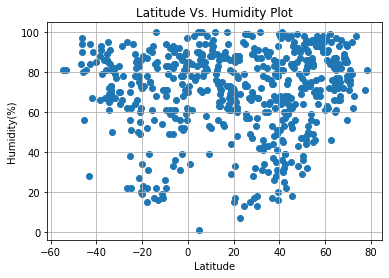

In [31]:
x_values = citi_weather_df["Lat"]
y_values = citi_weather_df["Humidity"]
plt.grid(visible=True)
plt.scatter(x_values,y_values)
plt.title("Latitude Vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Images/Lat_V_Humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

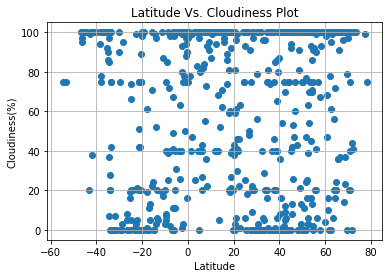

In [32]:
x_values = citi_weather_df["Lat"]
y_values = citi_weather_df["Cloudiness"]
plt.grid(visible=True)
plt.scatter(x_values,y_values)
plt.title("Latitude Vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Images/Lat_V_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

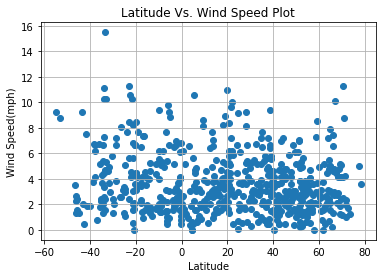

In [33]:
x_values = citi_weather_df["Lat"]
y_values = citi_weather_df["Wind Speed"]
plt.grid(visible=True)
plt.scatter(x_values,y_values)
plt.title("Latitude Vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("Images/Lat_V_Wind Speed.png")
plt.show()

## Linear Regression

In [12]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

0.061151430299975044


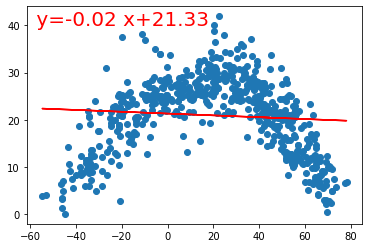

In [13]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(citi_weather_df["Lat"],citi_weather_df["Temperature"])  

regress_value = citi_weather_df["Lat"] * slope + intercept

plt.scatter(citi_weather_df["Lat"],citi_weather_df["Temperature"])

plt.plot(citi_weather_df["Lat"],regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(-60,40), fontsize=20,color="red")
print(pvalue)
plt.show()

In [14]:
Northern_df = citi_weather_df.loc[citi_weather_df["Lat"]>=0]

Northern_df

,City ID,City,Cloudiness,Country,Humidity,Lat,Lng,Temperature,Wind Speed
0,5536630,Cedar City,100,US,48,37.6775,-113.0619,26.89,2.22
1,2020744,Listvyanka,25,RU,91,51.8535,104.8693,12.54,1.93
2,338345,Edd,100,ER,69,13.9297,41.6925,32.57,0.90
3,6165406,Thompson,20,CA,46,55.7435,-97.8558,22.09,3.09
4,4031574,Provideniya,16,RU,60,64.3833,-173.3000,7.17,0.70
...,...,...,...,...,...,...,...,...,...
578,567183,Danilov,93,RU,77,58.1908,40.1717,18.31,2.10
580,2036713,Huanren,100,CN,100,41.2647,125.3667,21.42,2.28
581,3141310,Rørvik,20,NO,77,64.8621,11.2373,17.06,3.09
582,2122605,Okhotsk,100,RU,95,59.3833,143.3000,13.34,3.68


In [15]:
Southern_df = citi_weather_df.loc[citi_weather_df["Lat"]<0]

Southern_df

,City ID,City,Cloudiness,Country,Humidity,Lat,Lng,Temperature,Wind Speed
6,2399001,Mayumba,100,GA,88,-3.4320,10.6554,21.37,2.06
7,3445026,Vila Velha,20,BR,62,-20.3297,-40.2925,23.86,3.60
12,3366880,Hermanus,97,ZA,61,-34.4187,19.2345,6.00,2.05
14,964420,Port Elizabeth,20,ZA,91,-33.9180,25.5701,9.89,10.29
15,3652764,Puerto Ayora,97,EC,90,-0.7393,-90.3518,21.97,4.02
...,...,...,...,...,...,...,...,...,...
561,4034496,Fare,5,PF,75,-16.7000,-151.0167,25.78,7.36
572,964712,Plettenberg Bay,28,ZA,72,-34.0527,23.3716,10.93,7.26
573,3355624,Maltahöhe,66,NA,22,-24.8333,16.9833,11.26,5.13
579,3839307,Rawson,20,AR,28,-43.3002,-65.1023,14.16,9.26


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

6.087444370470038e-69


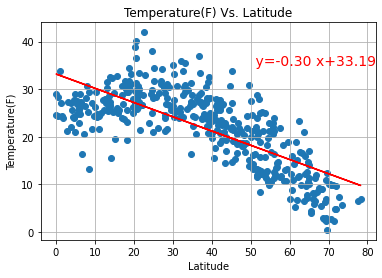

In [16]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Temperature(F) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(50,35), fontsize=14,color="red")
print(pvalue)
#plt.savefig("Images/Lat_V_Temp_N.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

1.2099477265104189e-39


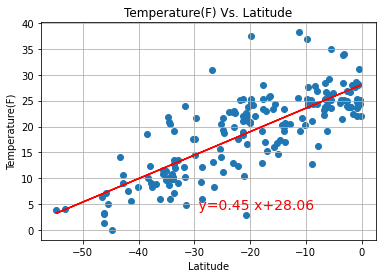

In [27]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Temperature(F) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(-30,4), fontsize=14,color="red")
print(pvalue)
#plt.savefig("Images/Lat_V_Temp_S.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.14863953224354717


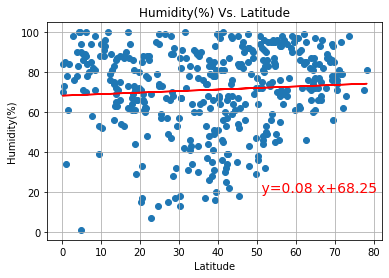

In [18]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Humidity(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(50,20), fontsize=14,color="red")
print(pvalue)
#plt.savefig("Images/Lat_V_Humid_N.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.04787351398415523


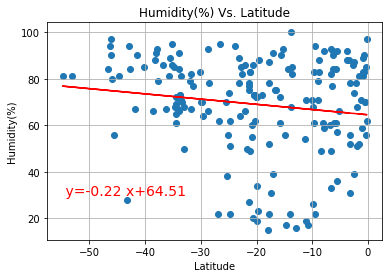

In [19]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Humidity(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(-55,30), fontsize=14,color="red")
print(pvalue)
#plt.savefig("Images/Lat_V_Humid_S.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.6373115002428232


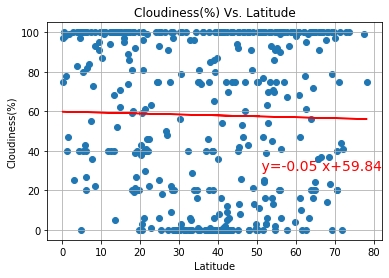

In [26]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Cloudiness(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(50,30), fontsize=14,color="red")
print(pvalue)
#plt.savefig("Images/Lat_V_Cloud_N.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.4168290182709532


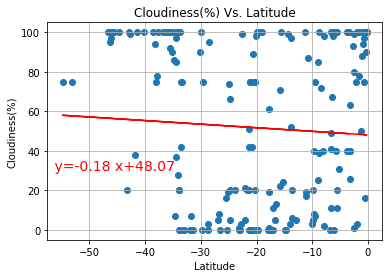

In [25]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Cloudiness(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(-57,30), fontsize=14,color="red")
print(pvalue)
#plt.savefig("Images/Lat_V_Cloud_S.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.37178926541231483


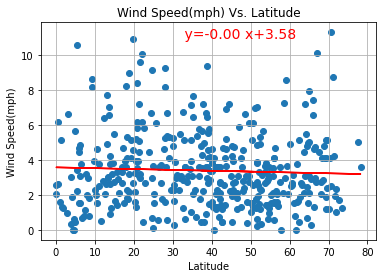

In [22]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Wind Speed(mph) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(32,11), fontsize=14,color="red")
print(pvalue)
#plt.savefig("Images/Lat_V_Wind_N.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.04558524278461672


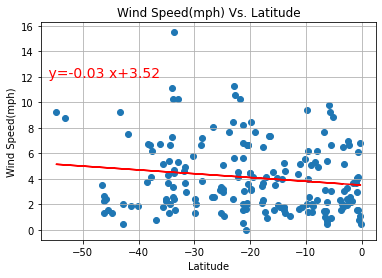

In [24]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Wind Speed(mph) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(-57,12), fontsize=14,color="red")
print(pvalue)
#plt.savefig("Images/Lat_V_Wind_S.png")
plt.show()